In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Wigner as wg
import mubs_utils as mu
from sage.all import *

In [3]:
p = 3
n = 3
d = p**n
F = GF(d, 'x'); x = F.gen()

In [4]:
FF = [F(0)] + [x**j for j in range(26)]
FF

[0,
 1,
 x,
 x^2,
 x + 2,
 x^2 + 2*x,
 2*x^2 + x + 2,
 x^2 + x + 1,
 x^2 + 2*x + 2,
 2*x^2 + 2,
 x + 1,
 x^2 + x,
 x^2 + x + 2,
 x^2 + 2,
 2,
 2*x,
 2*x^2,
 2*x + 1,
 2*x^2 + x,
 x^2 + 2*x + 1,
 2*x^2 + 2*x + 2,
 2*x^2 + x + 1,
 x^2 + 1,
 2*x + 2,
 2*x^2 + 2*x,
 2*x^2 + 2*x + 1,
 2*x^2 + 1]

First we import Kanat's standard and non-standard MUBs.

In [5]:
mubs  = np.load('MUBS/3-3-desarguesian.npy')
mubsk = np.load('MUBS/3-3-albert.npy')

No we do a cross check to see if any vectors are shared between MUBs.

In [6]:
def toList(mubs):
    return [mubs[d*k:d*(k+1)] for k in range(28)]

First let us see which bases are shared, we expect the first and second one to be the only ones.

In [7]:
def testBases(mubs1, mubs2):
    mubs1 = toList(mubs1)
    mubs2 = toList(mubs2)
    for i, B1 in enumerate(mubs1):
        for j, B2 in enumerate(mubs2):
            if np.all(np.isclose(B1, B2, rtol=1e-5)):
                print('Base {} and {} are shared.'.format(i,j))

testBases(mubs, mubsk)

Base 0 and 0 are shared.
Base 1 and 1 are shared.


Now we have to test individual vectors. Super loop!

In [8]:
def testVectors(mubs1, mubs2):
    mubs1 = toList(mubs1)
    mubs2 = toList(mubs2)
    for i, B1 in enumerate(mubs1[2:]):
        print('Testing base {}'.format(i+2))
        for j, B2 in enumerate(mubs2[2:]):
            for k in range(d):
                v = B1[:,k]
                for l in range(d):
                    if np.all(np.isclose(v, B2[:,l])):
                    # if np.all(v == B2[:,l]):
                        print('Vector {} in base {} is shared by base {} at position {}'.format(
                            k+2, i, j+2, l
                        ))

In [9]:
testVectors(mubs, mubsk)

Testing base 2
Testing base 3
Testing base 4
Testing base 5
Testing base 6
Testing base 7
Testing base 8
Testing base 9
Testing base 10
Testing base 11
Testing base 12
Testing base 13
Testing base 14
Testing base 15
Testing base 16
Testing base 17
Testing base 18
Testing base 19
Testing base 20
Testing base 21
Testing base 22
Testing base 23
Testing base 24
Testing base 25
Testing base 26
Testing base 27


So no vector from any base in the standard MUBs is found in any base of the non-standard MUBs. Now let's test the point operators.

In [10]:
wootters = wg.Wigner(FF, mubs)
kantor   = wg.Wigner(FF, mubsk, op='albert')

In [11]:
x = FF[15]
y = FF[20]
Aw = wootters.A(x, y)
Ak = kantor.A(x, y)

Some sanity checking, the point operators should unit trace and self-adjoint.

In [12]:
Aw.trace().round(4)

(1+0j)

In [13]:
Ak.trace().round(4)

(1+0j)

In [14]:
np.all(Aw == Aw.conj().T)

True

In [15]:
np.all(Ak == Ak.conj().T)

True

Now for some visual checks.

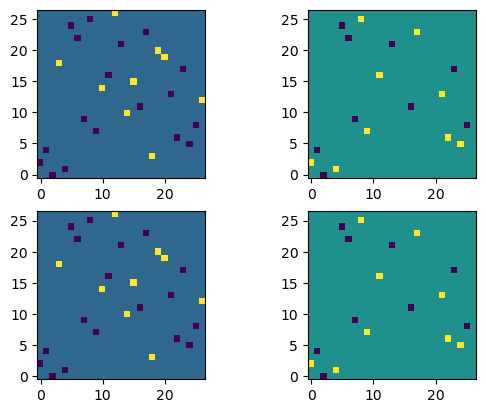

In [16]:
fig, axs = plt.subplots(2, 2)
axs[0][0].imshow(np.real(Aw), origin='lower')
axs[0][1].imshow(np.imag(Aw), origin='lower')
axs[1][0].imshow(np.real(Ak), origin='lower')
axs[1][1].imshow(np.imag(Ak), origin='lower')

In [17]:
np.all((Aw - Ak).round(6) == np.zeros((d,d)))

True

In [18]:
for x in FF:
    for y in FF:
        Aw = wootters.A(x, y).round(6)
        Ak = kantor.A(x, y).round(6)
        if not np.all(Aw == Ak):
            print('Found differing point operators, at ({}, {})'.format(x, y))

So all the point operators are the same. Let's do a quick check with the other standard MUBs.

In [19]:
mubs  = np.load('MUBS/3-3-desarguesian2.npy')
mubsk = np.load('MUBS/3-3-albert.npy')

In [20]:
testBases(mubs, mubsk)

Base 0 and 0 are shared.
Base 1 and 1 are shared.


In [21]:
testVectors(mubs, mubsk)

Testing base 2
Testing base 3
Testing base 4
Testing base 5
Testing base 6
Testing base 7
Testing base 8
Testing base 9
Testing base 10
Testing base 11
Testing base 12
Testing base 13
Testing base 14
Testing base 15
Testing base 16
Testing base 17
Testing base 18
Testing base 19
Testing base 20
Testing base 21
Testing base 22
Testing base 23
Testing base 24
Testing base 25
Testing base 26
Testing base 27


Again no repeated vectors at all!

In [22]:
wootters = wg.Wigner(FF, mubs)
kantor   = wg.Wigner(FF, mubsk, op='albert')

In [23]:
x = FF[0]
y = FF[0]
Aw = wootters.A(x, y)
Ak = kantor.A(x, y)

In [24]:
np.all(Aw.conj().T == Aw)

True

In [25]:
Aw.trace()

(0.9999932050704956+0j)

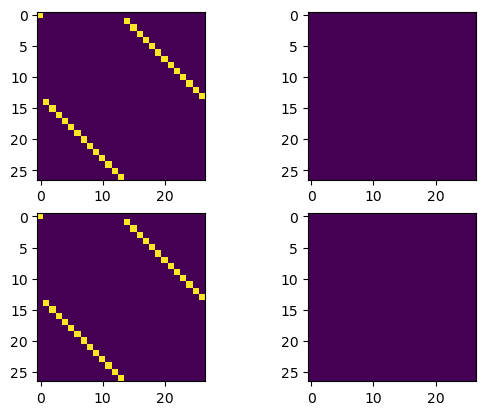

In [26]:
fig, axs = plt.subplots(2, 2)
axs[0][0].imshow(np.real(Aw))
axs[0][1].imshow(np.imag(Aw))
axs[1][0].imshow(np.real(Ak))
axs[1][1].imshow(np.imag(Ak))

I get a repeated origin operator!

In [27]:
x = FF[12]
y = FF[18]
Aw = wootters.A(x, y)
Ak = kantor.A(x, y)

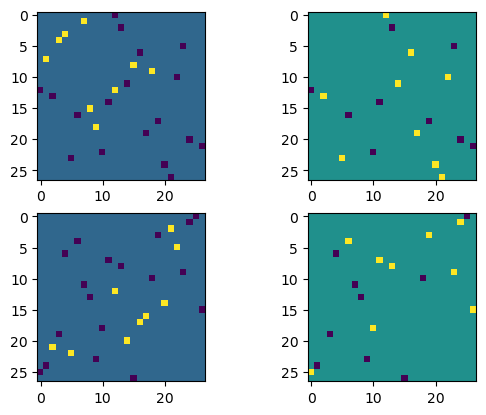

In [28]:
fig, axs = plt.subplots(2, 2)
axs[0][0].imshow(np.real(Aw))
axs[0][1].imshow(np.imag(Aw))
axs[1][0].imshow(np.real(Ak))
axs[1][1].imshow(np.imag(Ak))

Distinct non-origin point operators! Now suppose that $A_{\mathcal W} = U A_{\mathcal K}$ for some operator $U$. Is $U = A_{\mathcal W} A_{\mathcal K}^{-1}$ unitary?

In [29]:
U = Aw @ np.linalg.inv(Ak)

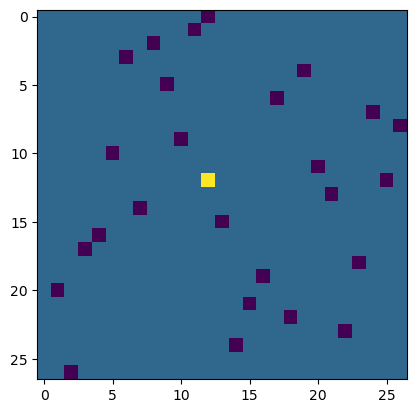

In [30]:
plt.imshow(np.real(U))

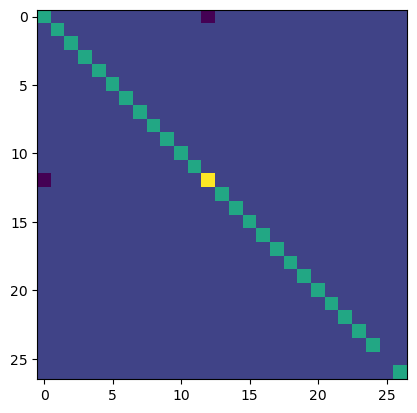

In [31]:
plt.imshow(np.real((U @ U.conj().T)))

At leat numerically, $U$ is **not** unitary. How does the $U$ compare using distinct points?

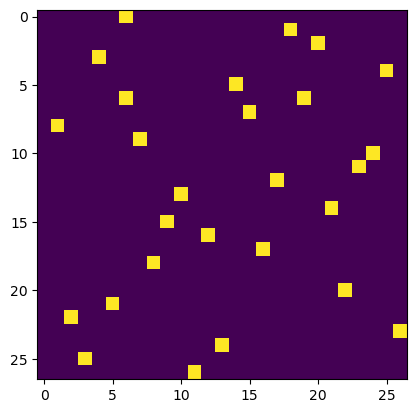

In [32]:
x = FF[6]
y = FF[23]
Aw = wootters.A(x, y)
Ak = kantor.A(x, y)

U = Aw @ np.linalg.inv(Ak)

plt.imshow(np.real(U))

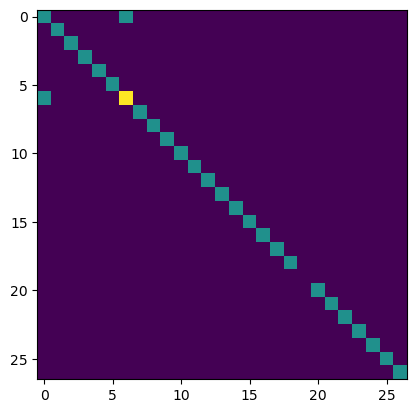

In [33]:
plt.imshow(np.real(U @ U.conj().T))

Also not unitary.